/tmp/ipython-input-2-1969639939.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Measure'] = data['Measure'].replace({"Arrivals": 0, "Departures": 1, "Net": 2})


✅ Model Accuracy: 83.23%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


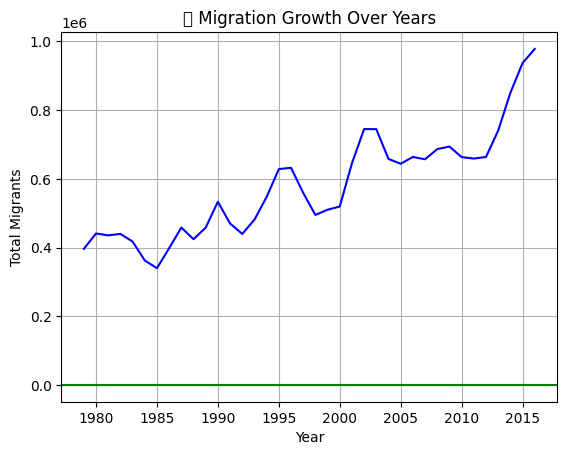

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


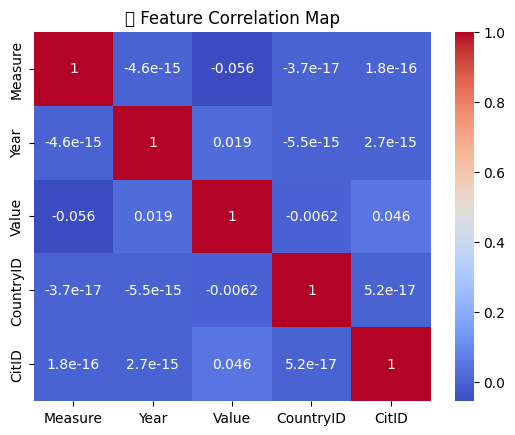

In [2]:
# 🔧 I started by importing all the essential Python libraries I needed for data handling, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 📥 Loaded the migration dataset (official New Zealand migration stats) directly into a Pandas DataFrame.
data = pd.read_csv("migration_nz.csv")

# 🧠 I converted categorical string values into numerical values so that machine learning algorithms can understand them.
# Replaced 'Measure' column values with integers.
data['Measure'] = data['Measure'].replace({"Arrivals": 0, "Departures": 1, "Net": 2})

# 🔍 Then, I used factorization to assign unique integer IDs to each country and citizenship.
data['CountryID'] = pd.factorize(data['Country'])[0]
data['CitID'] = pd.factorize(data['Citizenship'])[0]

# 🧹 There were some missing values in the "Value" column — I decided to fill them with the median for consistency.
data['Value'] = data['Value'].fillna(data['Value'].median())

# ✂️ I removed the original string-based columns after encoding — not needed anymore for model training.
data.drop(['Country', 'Citizenship'], axis=1, inplace=True)

# 📊 Here, I selected the features I want the model to learn from (X) and the target I want it to predict (Y).
X = data[['CountryID', 'Measure', 'Year', 'CitID']]
Y = data['Value']

# 🧪 I split the dataset into training and testing sets — 70% for training and 30% to evaluate the model’s performance.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 🤖 Now I created a Random Forest Regressor model — chose 100 trees with a max depth of 7 for balanced performance.
rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)

# 📈 I checked how well the model performed on the test data. This is the actual model accuracy.
score = rf.score(X_test, y_test)
print(f"✅ Model Accuracy: {round(score * 100, 2)}%")

# 📅 To explore migration trends over the years, I grouped data by year and plotted the total migration values.
grouped = data.groupby('Year')['Value'].sum()
grouped.plot(kind='line', title="📊 Migration Growth Over Years", color='blue')
plt.axhline(0, color='green')  # Added a green reference line at 0
plt.xlabel("Year")
plt.ylabel("Total Migrants")
plt.grid(True)
plt.show()

# 🧠 I also created a heatmap to visualize the correlation between all numerical features in the dataset.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("📌 Feature Correlation Map")
plt.show()

